In [1]:
import matplotlib.pyplot as plt

import torch
import torchvision.transforms as tf
from torchvision.datasets import CIFAR10

from convcnp import ConvCNP2d

torch.no_grad()

In [2]:
cnp = ConvCNP2d(3)
cnp.load_state_dict(torch.load('weights/convcnp2d_cifar10.pth.gz', map_location=torch.device('cpu')))
dataset = CIFAR10('~/data/cifar10', train=False, transform=tf.ToTensor())
to_pil = tf.ToPILImage()

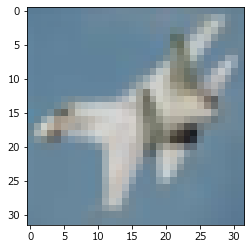

In [3]:
x, _ = dataset[10]
plt.imshow(to_pil(x))

## Randomized Mask (=random context points)

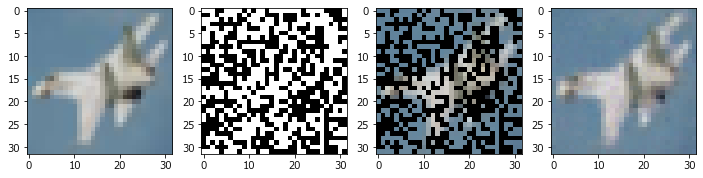

In [4]:
mask, f, _ = cnp.complete(x.unsqueeze(0))
plt.figure(figsize=(12, 4))
plt.subplot(141)
plt.imshow(to_pil(x))
plt.subplot(142)
plt.imshow(to_pil(mask.squeeze(0)))
plt.subplot(143)
plt.imshow(to_pil((x * mask).squeeze(0)))
plt.subplot(144)
plt.imshow(to_pil(f.squeeze(0)))

## Fixed Mask (=fixed context points)

In [5]:
mask = torch.empty(1, 1, 32, 32).bernoulli_(p=0.3).repeat(1, 3, 1, 1)

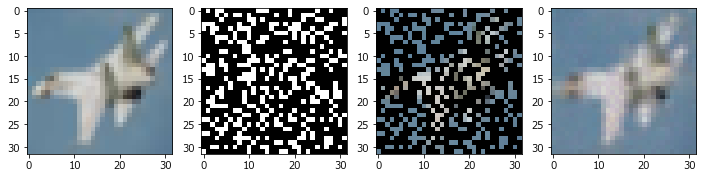

In [6]:
mask, f, _ = cnp.complete(x.unsqueeze(0), M_c=mask)
plt.figure(figsize=(12, 4))
plt.subplot(141)
plt.imshow(to_pil(x))
plt.subplot(142)
plt.imshow(to_pil(mask.squeeze(0)))
plt.subplot(143)
plt.imshow(to_pil((x * mask).squeeze(0)))
plt.subplot(144)
plt.imshow(to_pil(f.squeeze(0)))

## For readme

In [7]:
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

def demo(missing_rate, x):
    plt.title('Missing rate={}'.format(missing_rate))
    mask = torch.empty(16, 1, 32, 32).bernoulli_(p=1-missing_rate).repeat(1, 3, 1, 1)
    mask, f, _ = cnp.complete(x, M_c=mask)
    return plt.imshow(to_pil(make_grid(torch.cat([x, mask, mask*x, f], 0))))

In [8]:
dl = DataLoader(dataset, batch_size=16, shuffle=True)

In [9]:
x, _ = iter(dl).next()

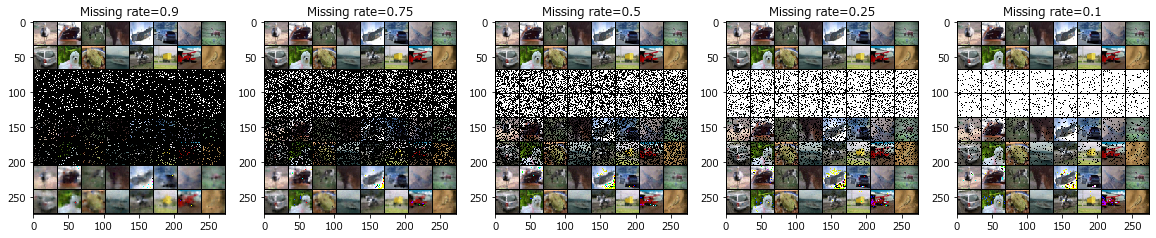

In [10]:
plt.figure(figsize=(20, 8))
plt.subplot(151)
demo(0.9, x)
plt.subplot(152)
demo(0.75, x)
plt.subplot(153)
demo(0.5, x)
plt.subplot(154)
demo(0.25, x)
plt.subplot(155)
demo(0.1, x)
# plt.savefig('cifar10-demo.png', transparent=True, bbox_inches='tight')